There is always a need to validate the stability of your machine learning model. We can’t fit the model to our training data and hope it would accurately work for the real data it has never seen before. **So we need some kind of assurance that your model has got most of the patterns from the data correct**, and its not picking up too much on the noise.




* In cross-validation, we run our modeling process on different subsets of the data `to get multiple measures of model quality`
* if your dataset is smaller, you should run cross-validation.
* To tackle overfit using **Cross Validation**

### Train_Test Split approach.
In this approach we `randomly split` the complete data into training and test sets. Then Perform the model training on the training set and use the test set for validation purpose

### K-Fold Cross Validation approach.

* The data is divided into `k subsets`. Suppose we have divided data into 5 folds i.e. K=5. Now we have 5 sets of data to train and test our model. So the model will get trained and tested 5 times, `but for every iteration we will use one fold as test data and rest all as training data`.

* As a general rule and empirical evidence, `K = 5 or 10` is generally preferred, but nothing’s fixed and it can take any value.


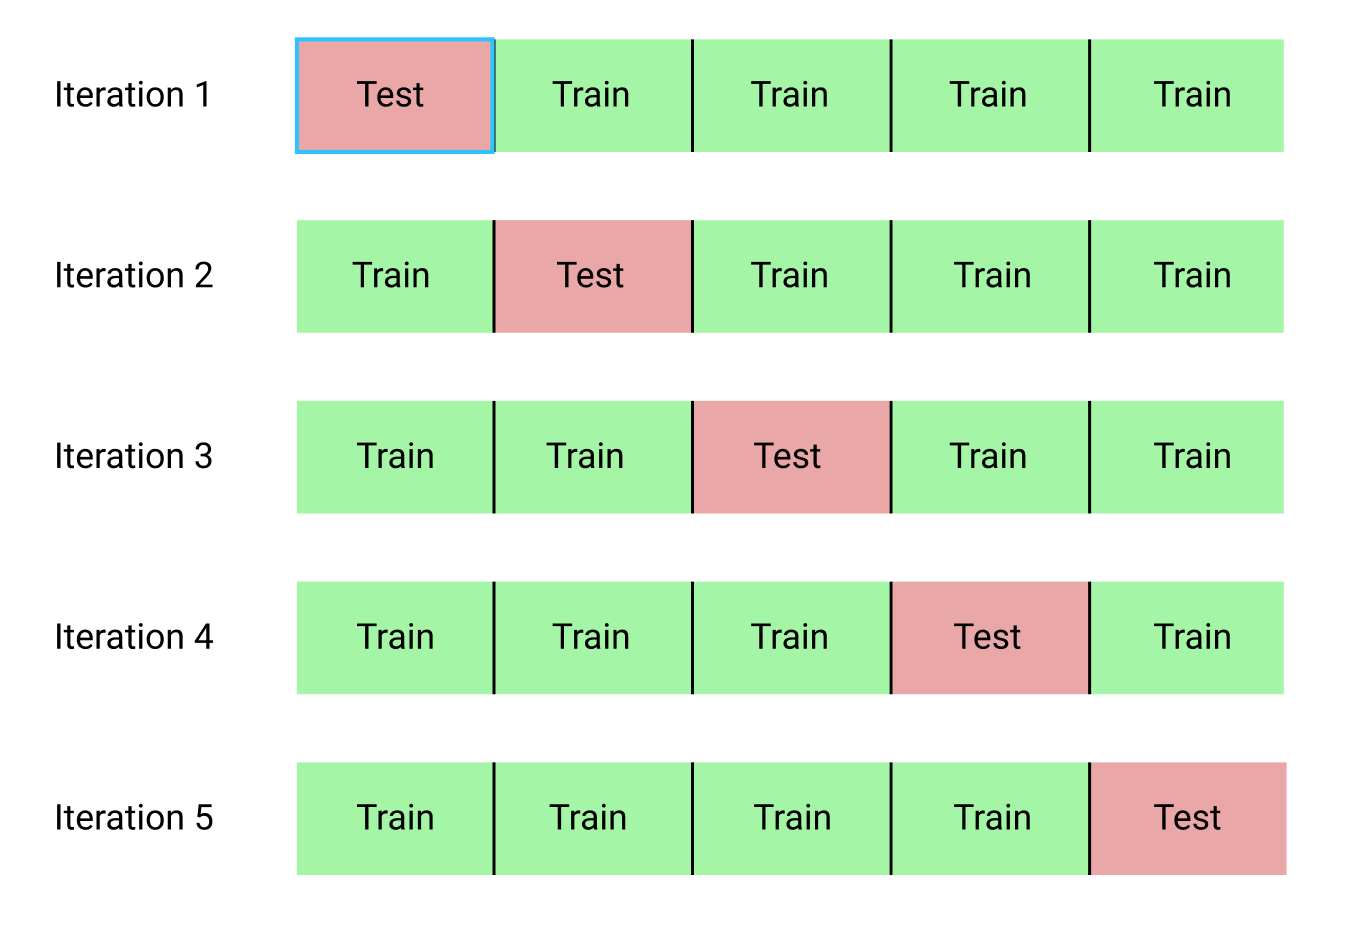

### 3. Stratified K-Fold Cross Validation approach.
* Stratified K Fold **used when just random shuffling and splitting the data is not sufficient**, and we want to have correct distribution of data in each fold.

* In some cases, there may be a **large imbalance in the response variables**. For example, in dataset concerning price of houses, there might be large number of houses having high price. Or in case of classification, there might be several times more negative samples than positive samples.

* In case of regression problem folds are selected so that the mean response value is approximately equal in all the folds. In case of classification problem folds are selected to have same proportion of class labels.

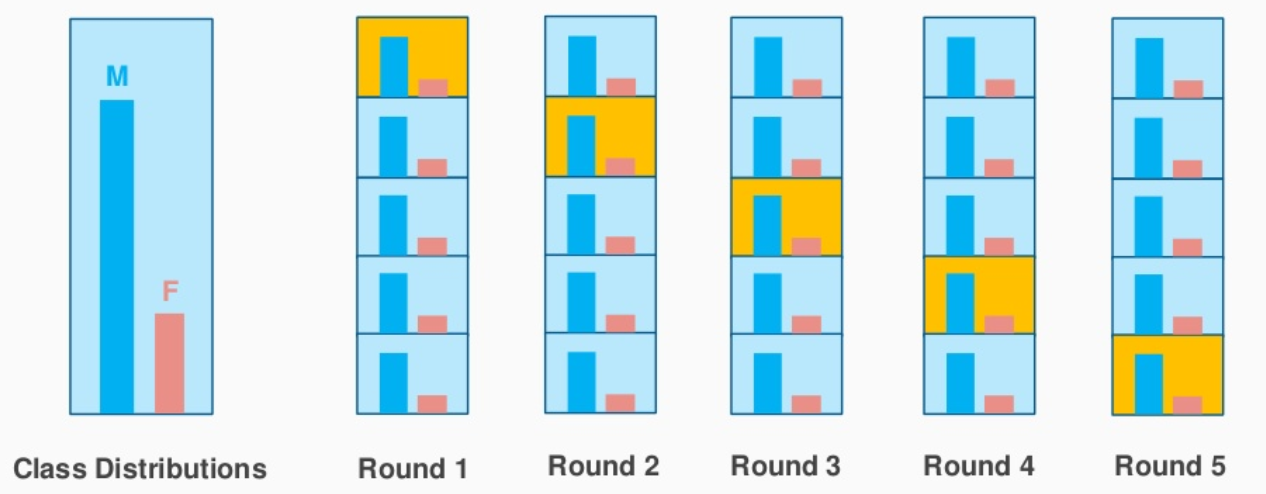

## Hyperparameters Tunning

To achieve high performance for these algorithms, you often need to **tune model hyperparameters**. Hyperparameters are the parameters of a model which `are not updated during training and are used to configure the model`.


Natively, Scikit-Learn provides two techniques to address hyperparameter tuning: **Grid Search** (GridSearchCV) and **Random Search** (RandomizedSearchCV). Though effective, both techniques are brute-force approaches `to finding the right hyperparameter configurations`, which is an expensive and time-consuming process!


### Code


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("telecom-churn.csv")
data.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [3]:
data.shape

(3333, 21)

In [4]:
data['international plan'] = data['international plan'].map({'yes': 1, 'no': 0})
data['voice mail plan'] = data['voice mail plan'].map({'yes': 1, 'no': 0})
data.head()

state  account length  area code phone number  international plan  \
0    KS             128        415     382-4657                   0   
1    OH             107        415     371-7191                   0   
2    NJ             137        415     358-1921                   0   
3    OH              84        408     375-9999                   1   
4    OK              75        415     330-6626                   1   

   voice mail plan  number vmail messages  total day minutes  total day calls  \
0                1                     25              265.1              110   
1                1                     26              161.6              123   
2                0                      0              243.4              114   
3                0                      0              299.4               71   
4                0                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [5]:
data['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

**Because the data was imbalanced, we should use `Stratified K-Fold Cross` to make it a correct distribution**

In [6]:
# Keep State
States = data.pop('state')

In [7]:
data.shape

(3333, 20)

In [8]:
data = data.drop('phone number', axis=1)

In [9]:
X, y = data.drop('churn', axis= 1), data['churn']

In [10]:
X.shape, y.shape

((3333, 18), (3333,))

#### Spliting data by `train_test_split` method

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state= 17)

### Model base line

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [13]:
tree = DecisionTreeClassifier(random_state= 17)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
acc = accuracy_score(y_pred, y_test)
acc

0.921

### Cross-validation & Stratified K-Fold 

In [14]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [15]:
skf = StratifiedKFold(n_splits=5, shuffle= True, random_state= 17)

In [22]:
val_scores = cross_val_score(estimator= tree,  X= X_train, y= y_train, cv= skf)
val_scores

array([0.91862955, 0.8993576 , 0.92077088, 0.91630901, 0.89699571])

In [20]:
val_scores.mean()

0.9104125502017257

### Grid Search 
We try all possible combinations of the parameters of interest and find the best ones

In [23]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [24]:
params = {'max_depth': np.arange(2, 11),
         'min_samples_leaf': np.arange(2, 11)}


In [38]:
best_tree = GridSearchCV(estimator= tree, param_grid= params, 
                         cv= skf, verbose= True, n_jobs= -1)

In [39]:
%%time
best_tree.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
CPU times: user 218 ms, sys: 84.3 ms, total: 302 ms
Wall time: 1.46 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
             verbose=True)

In [40]:
best_tree.best_params_

{'max_depth': 6, 'min_samples_leaf': 4}

In [41]:
best_tree.best_score_

0.9438485079633493

In [42]:
best_y_pred = best_tree.predict(X_test)
best_acc = accuracy_score(y_test, best_y_pred)
best_acc

0.94

### Random Search
RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long, and we will use random values from the range of each parameter.

In [52]:
params = {'max_depth':  np.arange(2, 11), 
         'min_samples_leaf': np.arange(2, 11),
          'max_features': np.arange(2, 11),
          'criterion' : ['gini', 'entropy']}

In [53]:
best_tree = RandomizedSearchCV(estimator= tree, param_distributions=params,
                              cv= skf, verbose= True, n_jobs= -1)

In [54]:
%%time

best_tree.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: user 139 ms, sys: 14.5 ms, total: 153 ms
Wall time: 295 ms


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
                   estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'max_features': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
                   verbose=True)

In [55]:
best_tree.best_params_

{'min_samples_leaf': 9,
 'max_features': 10,
 'max_depth': 9,
 'criterion': 'entropy'}

In [56]:
best_tree.best_score_

0.9267022635579124

### Conclusion
Grid Search is good when we work with a small number of hyperparameters. However, if the number of parameters to consider is particularly high and the magnitudes of influence are imbalanced, the better choice is to use the Random Search.